<a href="https://colab.research.google.com/github/LBQTrung/Python-exercise/blob/main/Chuong7_Kiem_dinh_gia_thuyet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kiểm định giả thuyết về phân phối của biến ngẫu nhiên

Import các thư viện cần thiết:

In [37]:
import numpy as np
from scipy import stats
import math

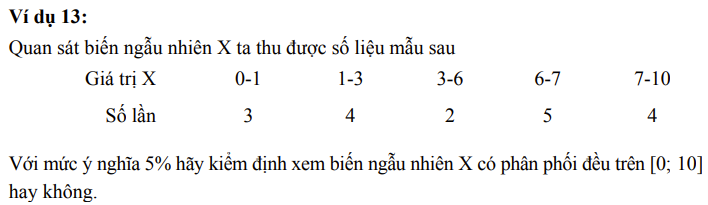

In [33]:
def uniform_test(data, alpha):
  n = []
  s = []
  p = []
  e = []
  # Thêm các khoảng, tần số thực nghiệm vào list:
  for i in data.keys():
    n.append(data[i])
    s.append(i)
  k = len(s)
  # Tính các xác suất tương ứng
  for i in range(k):
    temp = (s[i][1] - s[i][0]) / (s[k-1][1] - s[0][0])
    p.append(temp)
  # Tính các tần số lí thuyết
  for i in range(k):
    e.append(sum(n) * p[i])

  test_statistic = 0
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1)
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0")

In [25]:
data = {
    (0,1): 3,
    (1,3): 4,
    (3,6): 2,
    (6,7): 5,
    (7,10): 4
}

In [34]:
uniform_test(data, 0.05)

Ta không có bằng chứng để bác bỏ giả thuyết H0


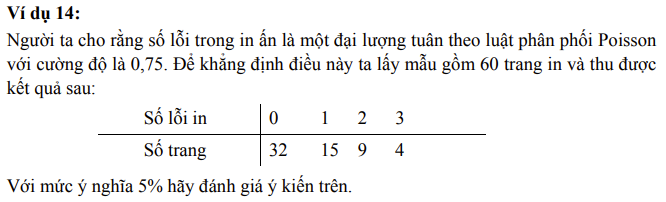

In [55]:
def poisson_test(data, lma, alpha):
  n = []
  s = []
  p = []
  e = []
  for i in data.keys():
    s.append(i)
    n.append(data[i])
  k = len(s)
  for i in range(k-1):
    p.append(math.exp(-lma) * (lma ** s[i]) /  math.factorial(s[i]))
  else:
    p.append(1 - sum(p))
  for i in range(k):
    e.append(sum(n) * p[i])
  test_statistic = 0
  for i in range(k):
    test_statistic += (n[i] - e[i]) ** 2 / e[i]
  chi2_stat = stats.chi2.ppf(1 - alpha, df = k - 1)
  if test_statistic > chi2_stat:
    print("Ta có bằng chứng để bác bỏ giả thuyết H0")
  else:
    print("Ta không có bằng chứng để bác bỏ giả thuyết H0")  

In [56]:
data = {
    0: 32,
    1: 15,
    2: 9,
    3: 4
}

In [57]:
poisson_test(data, 0.75, 0.05)

Ta không có bằng chứng để bác bỏ giả thuyết H0
